# Logistic regression
[Logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) is similar to `linear regression`, but instead of predicting a continuous output, classifies training examples by a set of categories or labels.  For example, linear regression on a set of social and economic data might be used to predict a person's income, but logistic regression could be used to predict whether that person was married, had children, or had ever been arrested.  In a basic sense, logistic regression only answers questions that have yes / no answers, or questions that can be answered with a 1 or 0.  However, it can easily be [extended](https://en.wikipedia.org/wiki/Multinomial_logistic_regression) to problems where there are a larger set of categories.


## Visualizate the sigmoid function

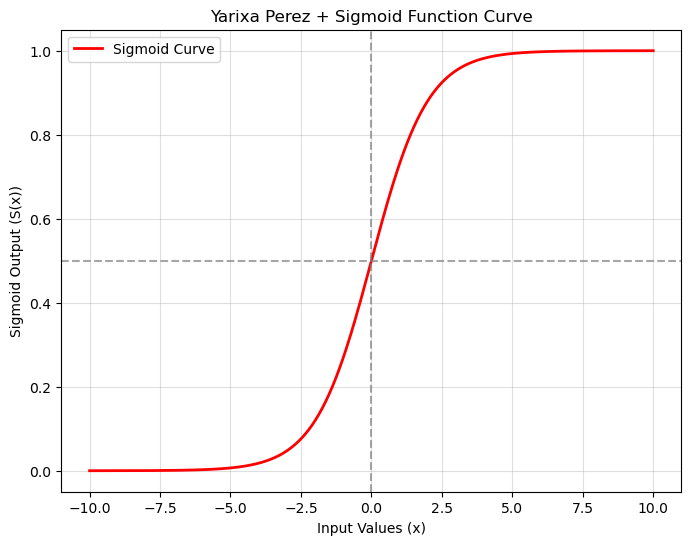

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of x values
x_range = np.linspace(-10, 10, 500)  # Covers a wide range to show the curve
sigmoid_values = sigmoid(x_range)

# Plot the sigmoid curve
plt.figure(figsize=(8, 6))
plt.plot(x_range, sigmoid_values, label="Sigmoid Curve", color="red", linewidth=2)

# Adding labels and title
plt.axvline(0, color='gray', linestyle='--', alpha=0.7)  # Highlight x=0 (decision boundary)
plt.axhline(0.5, color='gray', linestyle='--', alpha=0.7)  # Highlight y=0.5
plt.xlabel("Input Values (x)")
plt.ylabel("Sigmoid Output (S(x))")
plt.title("Yarixa Perez + Sigmoid Function Curve")
plt.grid(alpha=0.4)
plt.legend()
plt.show()

<h2 style="color:blue" align="center">Predicting if a person would buy life insurnace based on age using logistic regression</h2>

## Here is a binary [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) problem as there are only two possible outcomes (i.e. if person buys insurance or doesn't). 

In [7]:
import pandas as pd
# read csv by pandas
df = pd.read_csv("insurance_data.csv")
df.head(15)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


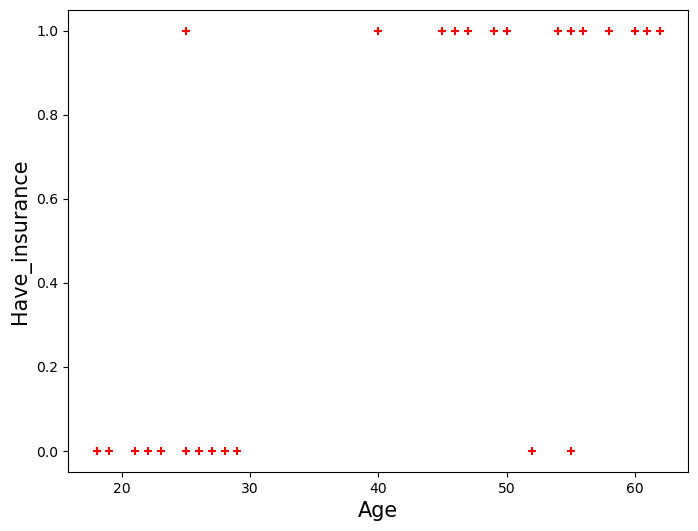

In [11]:
# Visualizing the distribution of insurance
# we use the scatter chart in here
plt.figure(figsize=(8, 6))
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')
plt.ylabel('Have_insurance', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

In [13]:
# select age as X
X = df[['age']].values
X

array([[22],
       [25],
       [47],
       [52],
       [46],
       [56],
       [55],
       [60],
       [62],
       [61],
       [18],
       [28],
       [27],
       [29],
       [49],
       [55],
       [25],
       [58],
       [19],
       [18],
       [21],
       [26],
       [40],
       [45],
       [50],
       [54],
       [23]], dtype=int64)

In [15]:
# select boolean value -- bought_insurance as Y
y=df.bought_insurance.values
y

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0], dtype=int64)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [19]:
X_train

array([[23],
       [40],
       [28],
       [29],
       [26],
       [55],
       [60],
       [55],
       [46],
       [62],
       [50],
       [61],
       [19],
       [18],
       [27],
       [47],
       [25],
       [54],
       [45],
       [18],
       [58]], dtype=int64)

In [21]:
X_test

array([[49],
       [21],
       [22],
       [52],
       [25],
       [56]], dtype=int64)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
# Create Logistic regression object
model.fit(X_train, y_train)


LogisticRegression()

In [27]:
# The input value is age, 
# The trained model will give us the corresponding boolean value -- bought insurance or not.

y_predicted = model.predict(X_test)
y_predicted

array([1, 0, 0, 1, 0, 1], dtype=int64)

In [29]:
model.predict_proba(X_test)

array([[0.13553531, 0.86446469],
       [0.97512329, 0.02487671],
       [0.96986399, 0.03013601],
       [0.07984399, 0.92015601],
       [0.94684104, 0.05315896],
       [0.03793325, 0.96206675]])

In [31]:
model.score(X_test,y_test)

0.6666666666666666

In [33]:
y_predicted

array([1, 0, 0, 1, 0, 1], dtype=int64)

In [35]:
X_test

array([[49],
       [21],
       [22],
       [52],
       [25],
       [56]], dtype=int64)

**model.coef_ indicates value of m in y=m*x + b equation**

In logistic regression, we can consider y = m*f(x)+b, where f(x) is the sigmoid function

In [37]:
model.coef_

array([[0.19719679]])

**model.intercept_ indicates value of b in y=m*x + b equation**

In [39]:
model.intercept_

array([-7.80976434])

**Lets defined sigmoid function now and do the math with hand**

There's a fairly obvious area near the center of the plot where a line could divide the two colors of points with a small amount of error.

# Simple Logistic Regression

To implement logistic regression, I need a hypothesis function $h_\theta(x)$, a cost function $J(\theta)$, and a gradient function that computes the partial derivatives of $J(\theta)$.

In logistic regression, $h_\theta$ is the [sigmoid](https://www.quora.com/Logistic-Regression-Why-sigmoid-function) function.  The sigmoid function is bounded between 0 and 1, and produces a value that can be interpreted as a probability.  This value can also be a yes / no answer with a cross-over, or decision boundary, at 0.5:

$$
h_\theta(x) = \frac{1}{1 + e^{ \theta^Tx}}
$$

Using mean squared error from linear regression isn't a good idea here, as the resulting cost function [isn't convex](http://mathworld.wolfram.com/SigmoidFunction.html) and so is not well-suited for gradient descent.  Instead, the difference of $h_\theta(x^i) - y^i$ is calculated differently for $y=0$ and $y=1$, and the result is [transformed](https://stackoverflow.com/questions/32986123/why-the-cost-function-of-logistic-regression-has-a-logarithmic-expression) [logarithmically](https://math.stackexchange.com/questions/886555/deriving-cost-function-using-mle-why-use-log-function) into a convex function.

[Log loss (Cross-entropy)](https://machinelearningmastery.com/cross-entropy-for-machine-learning/) function:
$$
J(\theta) =-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))
$$

Fortunately, the [derivative](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression) of this function is exactly the same as that of linear regression, just with a different $h_\theta(x)$:

$$
\frac{\partial}{\partial\theta_{j}}J(\theta) =\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i
$$

In [41]:
import numpy as np

def sigmoid(X):
    return 1 / (1 + np.exp(-X))

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    """
    Computes the cost function for logistic regression.
    
    Parameters:
    theta: ndarray
        Model parameters (weights), a 1D array.
    X: ndarray
        Feature matrix where rows are samples and columns are features.
    y: ndarray
        Target values, a 1D array of binary labels (0 or 1).

    Returns:
    float
        The cost value, a measure of how well the model predicts the target values.
    """

    # Number of training examples
    m = len(y)

    # Compute the predicted probabilities using the sigmoid function
    # h represents the model's predictions for each training example
    h = sigmoid(X.dot(theta))

    # Compute the cost function for logistic regression
    # - y.dot(np.log(h)) computes the log loss for correctly predicted examples
    # - (1 - y).dot(np.log(1 - h)) computes the log loss for incorrectly predicted examples
    # -(1 / m) scales the total loss by the number of training examples to compute the average
    cost = -(1 / m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))

    return cost


# Define the gradient function for logistic regression
def gradient(theta, X, y):
    """
    Computes the gradient of the cost function with respect to the model parameters.
    
    Parameters:
    theta: ndarray
        Model parameters (weights), a 1D array.
    X: ndarray
        Feature matrix where rows are samples and columns are features.
    y: ndarray
        Target values, a 1D array of binary labels (0 or 1).

    Returns:
    ndarray
        Gradient vector, indicating the direction and magnitude of change for each parameter.
    """
    
    m = len(y)  # Number of training examples
    h = sigmoid(X.dot(theta))  # Predicted probabilities using the sigmoid function
    gradient = (1 / m) * X.T.dot(h - y)  # Compute the gradient vector

    return gradient


In [43]:
X.T

array([[22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 55,
        25, 58, 19, 18, 21, 26, 40, 45, 50, 54, 23]], dtype=int64)

It's worth noting the treatment of `y` and `theta` above.  In each function, we explicitly convert each to an $n$ or $m \times 1$ `ndarray`, so the matrix operations work correctly.  An alternative is to use a numpy `matrix`, which has stricter linear algebra semantics and treats 1-dimensional matrices more like column vectors.  However, we found that it was awkward to get the matrix interface to work correctly with both the optimization function used below, and with TensorFlow.  The indexing syntax can be thought of as explicitly columnizing the array of parameters or labels.

Instead of manually writing a gradient descent, we use an optimization algorithm from Scipy called [`minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to perform it.  This function takes as parameters the cost function, an initial set of parameters for $\theta$, the gradient function, and a tuple of args to pass to each.  We define a `train` function that prepends a columns of 1s to the training data (allowing for a bias parameter $\theta_0$), run the minimization function and return the first of its return values, final parameters for $\theta$.

In [49]:
from scipy.optimize import minimize

def train(X, y):

    # Reshape X to include a bias term (intercept)
    X = np.column_stack((np.ones(len(X)), X))  # Adds a column of 1s for the intercept
    
    # Initialize theta (parameters) as a zero vector with the same number of features as X
    theta = np.zeros(X.shape[1])
    
    # Minimize the cost function using scipy.optimize.minimize
    # - fun: The cost function to minimize
    # - x0: Initial guess for theta (parameters)
    # - args: Additional arguments passed to the cost function (X and y)
    # - method: Optimization algorithm ("TNC" in this case)
    # - jac: The gradient function used for optimization
    result = minimize(fun=cost_function, x0=theta, args=(X, y), method='TNC', jac=gradient, options = {'maxfun': 4000})
    
    
    return result

theta = train(X_train, y_train)

# Extract model coefficients
theta_optimized = theta.x
intercept = theta_optimized[0]  # Intercept
coef = theta_optimized[1:]      # Coefficients

print('theta: ', intercept, coef)

theta:  -7.798096947323418 [0.19700555]


In [ ]:
-7.80976434 + 0.19719679 * x

In [59]:
# Predict function
def predict(X, theta):
    probabilities = sigmoid(X.dot(theta))
    return (probabilities >= 0.5).astype(int)

# Make predictions
X_test_C = np.column_stack((np.ones(len(X_test)), X_test)) # Converts X_test to the same format as the training data to be used with model's weights

# Make predictions on the test set
predictions_test = predict(X_test_C, theta_optimized) # Generates predictions using trained logistic regression model
                                                      # Allows model to classify new data after being trained on training data
                                                      

# Calculate accuracy on the test set
accuracy_test = np.mean(predictions_test == y_test) * 100
print("Test Accuracy:", accuracy_test, "%")

Test Accuracy: 66.66666666666666 %


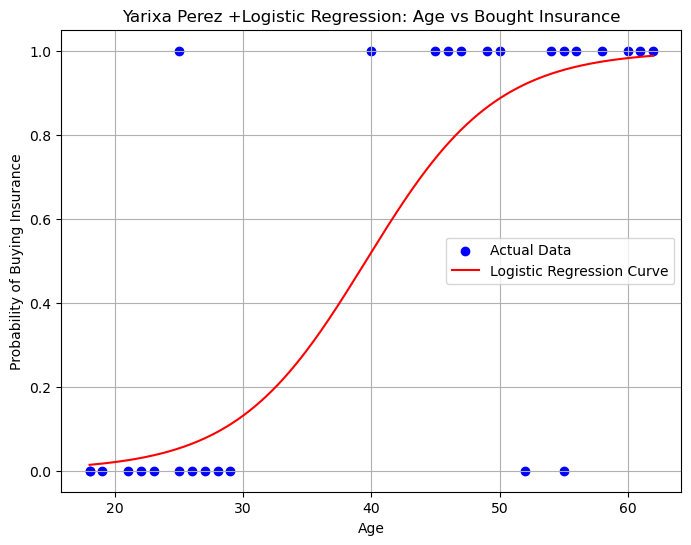

In [61]:
# Visualize the logistic regression fit
plt.figure(figsize=(8, 6))

# Scatter plot of actual data
plt.scatter(X, y, color='blue', label='Actual Data')

# Logistic regression curve
age_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

X_range = np.column_stack((np.ones(len(age_range)), age_range)) # Converts age_range to a format for logic regression
                                                                # Allows data to be multipled with theta_optimized

probabilities = sigmoid(X_range.dot(theta_optimized)) # Sigmoid function transforms linear output into probabilities
                                                      # Computes the predicted probabilities for each value in age_range

plt.plot(age_range, probabilities, color='red', label='Logistic Regression Curve')

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Probability of Buying Insurance')
plt.title('Yarixa Perez +Logistic Regression: Age vs Bought Insurance')
plt.legend()
plt.grid()
plt.show()